In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
cd /content/drive/MyDrive/Data

/content/drive/MyDrive/Artificial_intelligence/data


In [ ]:
ls

bangla_banknote_v2/  flowers/     Rice_Image_Dataset/     VN_food/
Bangla_money.zip     my_model.h5  Rice_Image_Dataset.zip  VN_food.zip


In [ ]:
!unzip 'Rice_Image_Dataset.zip'

In [ ]:
import cv2
from pathlib import Path
rice_dataset_folder = '/content/drive/MyDrive/Artificial_intelligence/data/Rice_Image_Dataset/'
classnames = []
for path in Path(rice_dataset_folder).iterdir():
    if path.is_dir():
        classnames.append(str(path).split('/')[-1])
print(classnames)
X = []
y = []
for i in range(len(classnames)):
  print(classnames[i])
  images = list(Path(rice_dataset_folder+classnames[i]).glob('*'))
  for image in range(int(0.4*len(images))):
    img = cv2.imread(str(images[image]))
    img = cv2.resize(img, (128, 128))
    img = img.astype('float32')
    img = img/255
    X.append(img)
    y.append(i)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
Arborio
Basmati
Ipsala
Jasmine
Karacadag


In [ ]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 128, 128, 3)
(2000, 128, 128, 3)
(8000, 5)
(2000, 5)


In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

[0. 0. 0. 1. 0.]


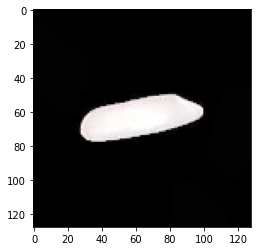

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[6])
print(y_train[6])

In [ ]:
from keras.models import Sequential, Model
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=X_train[0].shape, padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
# ANN
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 128)     

In [ ]:
import keras
model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, verbose=2)

Epoch 1/20
63/63 - 5s - loss: 0.3374 - accuracy: 0.8725 - 5s/epoch - 74ms/step
Epoch 2/20
63/63 - 4s - loss: 0.0851 - accuracy: 0.9710 - 4s/epoch - 64ms/step
Epoch 3/20
63/63 - 4s - loss: 0.0845 - accuracy: 0.9699 - 4s/epoch - 65ms/step
Epoch 4/20
63/63 - 4s - loss: 0.0734 - accuracy: 0.9737 - 4s/epoch - 65ms/step
Epoch 5/20
63/63 - 4s - loss: 0.0607 - accuracy: 0.9796 - 4s/epoch - 65ms/step
Epoch 6/20
63/63 - 4s - loss: 0.0596 - accuracy: 0.9811 - 4s/epoch - 67ms/step
Epoch 7/20
63/63 - 4s - loss: 0.0504 - accuracy: 0.9833 - 4s/epoch - 65ms/step
Epoch 8/20
63/63 - 4s - loss: 0.0508 - accuracy: 0.9816 - 4s/epoch - 65ms/step
Epoch 9/20
63/63 - 4s - loss: 0.0294 - accuracy: 0.9901 - 4s/epoch - 65ms/step
Epoch 10/20
63/63 - 4s - loss: 0.0272 - accuracy: 0.9908 - 4s/epoch - 65ms/step
Epoch 11/20
63/63 - 4s - loss: 0.0338 - accuracy: 0.9889 - 4s/epoch - 65ms/step
Epoch 12/20
63/63 - 4s - loss: 0.0368 - accuracy: 0.9881 - 4s/epoch - 65ms/step
Epoch 13/20
63/63 - 4s - loss: 0.0245 - accuracy:

In [ ]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 1s 11ms/step - loss: 0.0397 - accuracy: 0.9885


[0.039680518209934235, 0.9884999990463257]

In [ ]:
model.save('rice_classification_weight.h5')  # creates a HDF5 file 'my_model.h5'

In [ ]:
from keras.models import load_model
model = load_model('rice_classification_weight.h5')

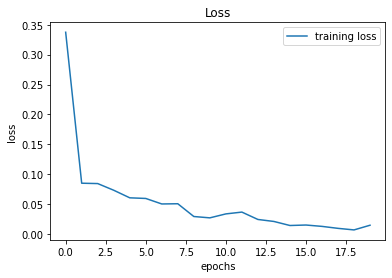

In [ ]:
# plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
# plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

(128, 128, 3)
1/1 [==============================] - 0s 25ms/step
Pred:  Ipsala
True label:  Ipsala


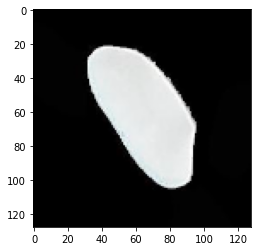

In [ ]:
# n = 0
n+=1
print(X_test[n].shape)
plt.imshow(X_test[n])
pred = model.predict(X_test[n].reshape(1, 128, 128, 3))
print('Pred: ', classnames[pred.argmax()])
print('True label: ', classnames[y_test[n].argmax()])